In [2]:
import numpy as np
import pandas as pd
from numpy import log10
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import folium
import sklearn
import time


In [3]:
wdbc = pd.read_csv("https://raw.githubusercontent.com/leydsonbarros/machinelearning-breastcancer/main/data/wdbc.data", sep=",",encoding = "ISO-8859-1")

**Atributos**

ID number

Diagnosis (M = malignant, B = benign)


Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry
	j) fractal dimension ("coastline approximation" - 1)

# **Limpeza de dados**

In [4]:
#Visualização dos dados
wdbc.head()

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
 #Verificando se existe dados nulos
print(wdbc.isnull().sum())

ID                    0
Diagnosis             0
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64


In [6]:
#Verificando os tipos dos dados
wdbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   Diagnosis           569 non-null    object 
 2   radius1             569 non-null    float64
 3   texture1            569 non-null    float64
 4   perimeter1          569 non-null    float64
 5   area1               569 non-null    float64
 6   smoothness1         569 non-null    float64
 7   compactness1        569 non-null    float64
 8   concavity1          569 non-null    float64
 9   concave_points1     569 non-null    float64
 10  symmetry1           569 non-null    float64
 11  fractal_dimension1  569 non-null    float64
 12  radius2             569 non-null    float64
 13  texture2            569 non-null    float64
 14  perimeter2          569 non-null    float64
 15  area2               569 non-null    float64
 16  smoothne

In [7]:
#Verificando se existe dados duplicados
len(wdbc)

569

In [8]:
#  Eliminando linhas duplicadas.
wdbc = wdbc.drop_duplicates()

In [9]:

len(wdbc)

569

# **Analise do dataframe**

In [10]:
#Visualização dos dados
wdbc.head()

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
wdbcMean = wdbc[['ID','Diagnosis']]
wdbcsum = wdbc[['ID','Diagnosis']]

In [ ]:
wdbcMean['radiusMean'] = (wdbc['radius1'] + wdbc['radius2'] + wdbc['radius3'])/3
wdbcMean['textureMean'] = (wdbc['texture1'] + wdbc['texture2'] + wdbc['texture3'])/3
wdbcMean['areaMean'] = (wdbc['area1'] + wdbc['area2'] + wdbc['area3'])/3
wdbcMean['smoothnessMean'] = (wdbc['smoothness1'] + wdbc['smoothness2'] + wdbc['smoothness3'])/3
wdbcMean['compactnessMean'] = (wdbc['compactness1'] + wdbc['compactness2'] + wdbc['compactness3'])/3
wdbcMean['concavityMean'] = (wdbc['concavity1'] + wdbc['concavity2'] + wdbc['concavity3'])/3
wdbcMean['concave_pointsMean'] = (wdbc['concave_points1'] + wdbc['concave_points2'] + wdbc['concave_points3'])/3
wdbcMean['symmetryMean'] = (wdbc['symmetry1'] + wdbc['symmetry2'] + wdbc['symmetry3'])/3
wdbcMean['fractal_dimensionMean'] = (wdbc['fractal_dimension1'] + wdbc['fractal_dimension2'] + wdbc['fractal_dimension3'])/3
wdbcMean['perimeterMean'] = (wdbc['perimeter1'] + wdbc['perimeter2'] + wdbc['perimeter3'])/3

wdbcsum['radiussum'] = (wdbc['radius1'] + wdbc['radius2'] + wdbc['radius3'])
wdbcsum['texturesum'] = (wdbc['texture1'] + wdbc['texture2'] + wdbc['texture3'])
wdbcsum['areasum'] = (wdbc['area1'] + wdbc['area2'] + wdbc['area3'])
wdbcsum['smoothnesssum'] = (wdbc['smoothness1'] + wdbc['smoothness2'] + wdbc['smoothness3'])
wdbcsum['compactnesssum'] = (wdbc['compactness1'] + wdbc['compactness2'] + wdbc['compactness3'])
wdbcsum['concavitysum'] = (wdbc['concavity1'] + wdbc['concavity2'] + wdbc['concavity3'])
wdbcsum['concave_pointssum'] = (wdbc['concave_points1'] + wdbc['concave_points2'] + wdbc['concave_points3'])
wdbcsum['symmetrysum'] = (wdbc['symmetry1'] + wdbc['symmetry2'] + wdbc['symmetry3'])
wdbcsum['fractal_dimensionsum'] = (wdbc['fractal_dimension1'] + wdbc['fractal_dimension2'] + wdbc['fractal_dimension3'])
wdbcsum['perimetersum'] = (wdbc['perimeter1'] + wdbc['perimeter2'] + wdbc['perimeter3'])


In [13]:
wdbcMean.head()


,ID,Diagnosis,radiusMean,textureMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concave_pointsMean,symmetryMean,fractal_dimensionMean,perimeterMean
0,842302,M,14.821667,9.538433,1057.800000,0.095666,0.330747,0.355243,0.142790,0.244010,0.067934,105.329667
1,842517,M,15.367833,13.971300,1118.693333,0.071255,0.092773,0.115700,0.089857,0.156697,0.049741,98.366000
2,84300903,M,14.668533,15.855633,1002.010000,0.086717,0.208153,0.228707,0.130493,0.196900,0.050714,95.695000
3,84348301,M,8.941867,16.012000,327.010000,0.120470,0.408260,0.328303,0.127123,0.327710,0.093216,59.965000
4,84358402,M,14.529067,10.597100,988.813333,0.083063,0.120803,0.218293,0.095217,0.144953,0.046908,97.579333


In [14]:
wdbcsum.head()

,ID,Diagnosis,radiussum,texturesum,areasum,smoothnesssum,compactnesssum,concavitysum,concave_pointssum,symmetrysum,fractal_dimensionsum,perimetersum
0,842302,M,44.4650,28.6153,3173.40,0.286999,0.99224,1.06573,0.42837,0.73203,0.203803,315.989
1,842517,M,46.1035,41.9139,3356.08,0.213765,0.27832,0.34710,0.26957,0.47009,0.149222,295.098
2,84300903,M,44.0056,47.5669,3006.03,0.260150,0.62446,0.68612,0.39148,0.59070,0.152141,287.085
3,84348301,M,26.8256,48.0360,981.03,0.361410,1.22478,0.98491,0.38137,0.98313,0.279648,179.895
4,84358402,M,43.5872,31.7913,2966.44,0.249190,0.36241,0.65488,0.28565,0.43486,0.140725,292.738


# **Arvore de Decisão**

In [15]:
# Separando X e y
X = wdbc.drop(['ID','Diagnosis'],axis=1)
Y = wdbc.Diagnosis
names = ["radius1","texture1","perimeter1","area1","smoothness1","compactness1","concavity1","concave_points1","symmetry1","fractal_dimension1","radius2","texture2","perimeter2","area2","smoothness2","compactness2","concavity2","concave_points2","symmetry1","fractal_dimension2","radius3","texture3","perimeter3","area3","smoothness3","compactness3","concavity3","concave_points3","symmetry3","fractal_dimension3"]

## Análise para wdbc

In [16]:
# Fazendo o train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [17]:
# Importando a árvore de decisão
from sklearn import tree

In [18]:
# Criando o classificador e fazendo o fit
wdbc_clf = tree.DecisionTreeClassifier(random_state=42,max_depth=10).fit(X_train,y_train)

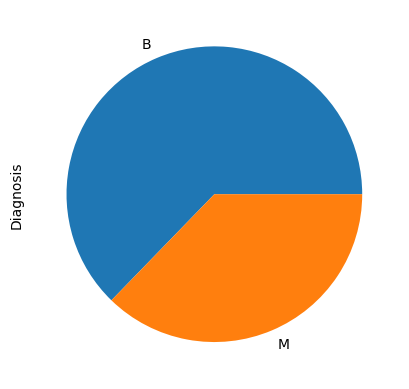

In [19]:


wdbc['Diagnosis'].value_counts().plot(kind='pie');

In [20]:

importances = wdbc_clf.feature_importances_


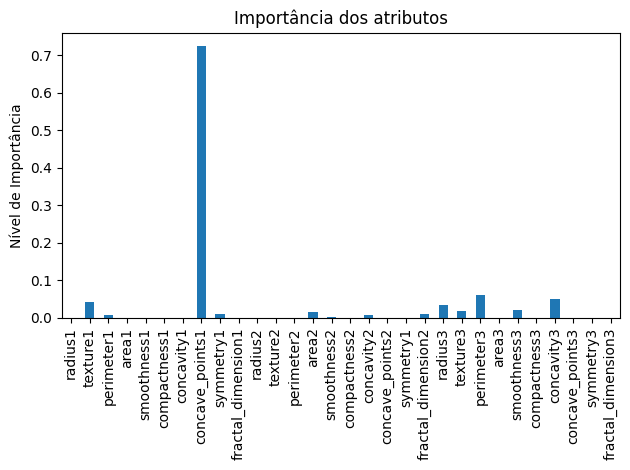

In [21]:

wdbc_clf_importances = pd.Series(importances, index=names)

fig, ax = plt.subplots()
wdbc_clf_importances.plot.bar(ax=ax)
ax.set_title("Importância dos atributos")
ax.set_ylabel("Nível de Importância")
fig.tight_layout()


In [22]:
wdbc_clf.classes_

array(['B', 'M'], dtype=object)

In [23]:
# Verificando o score
wdbc_clf.score(X_train,y_train)

1.0

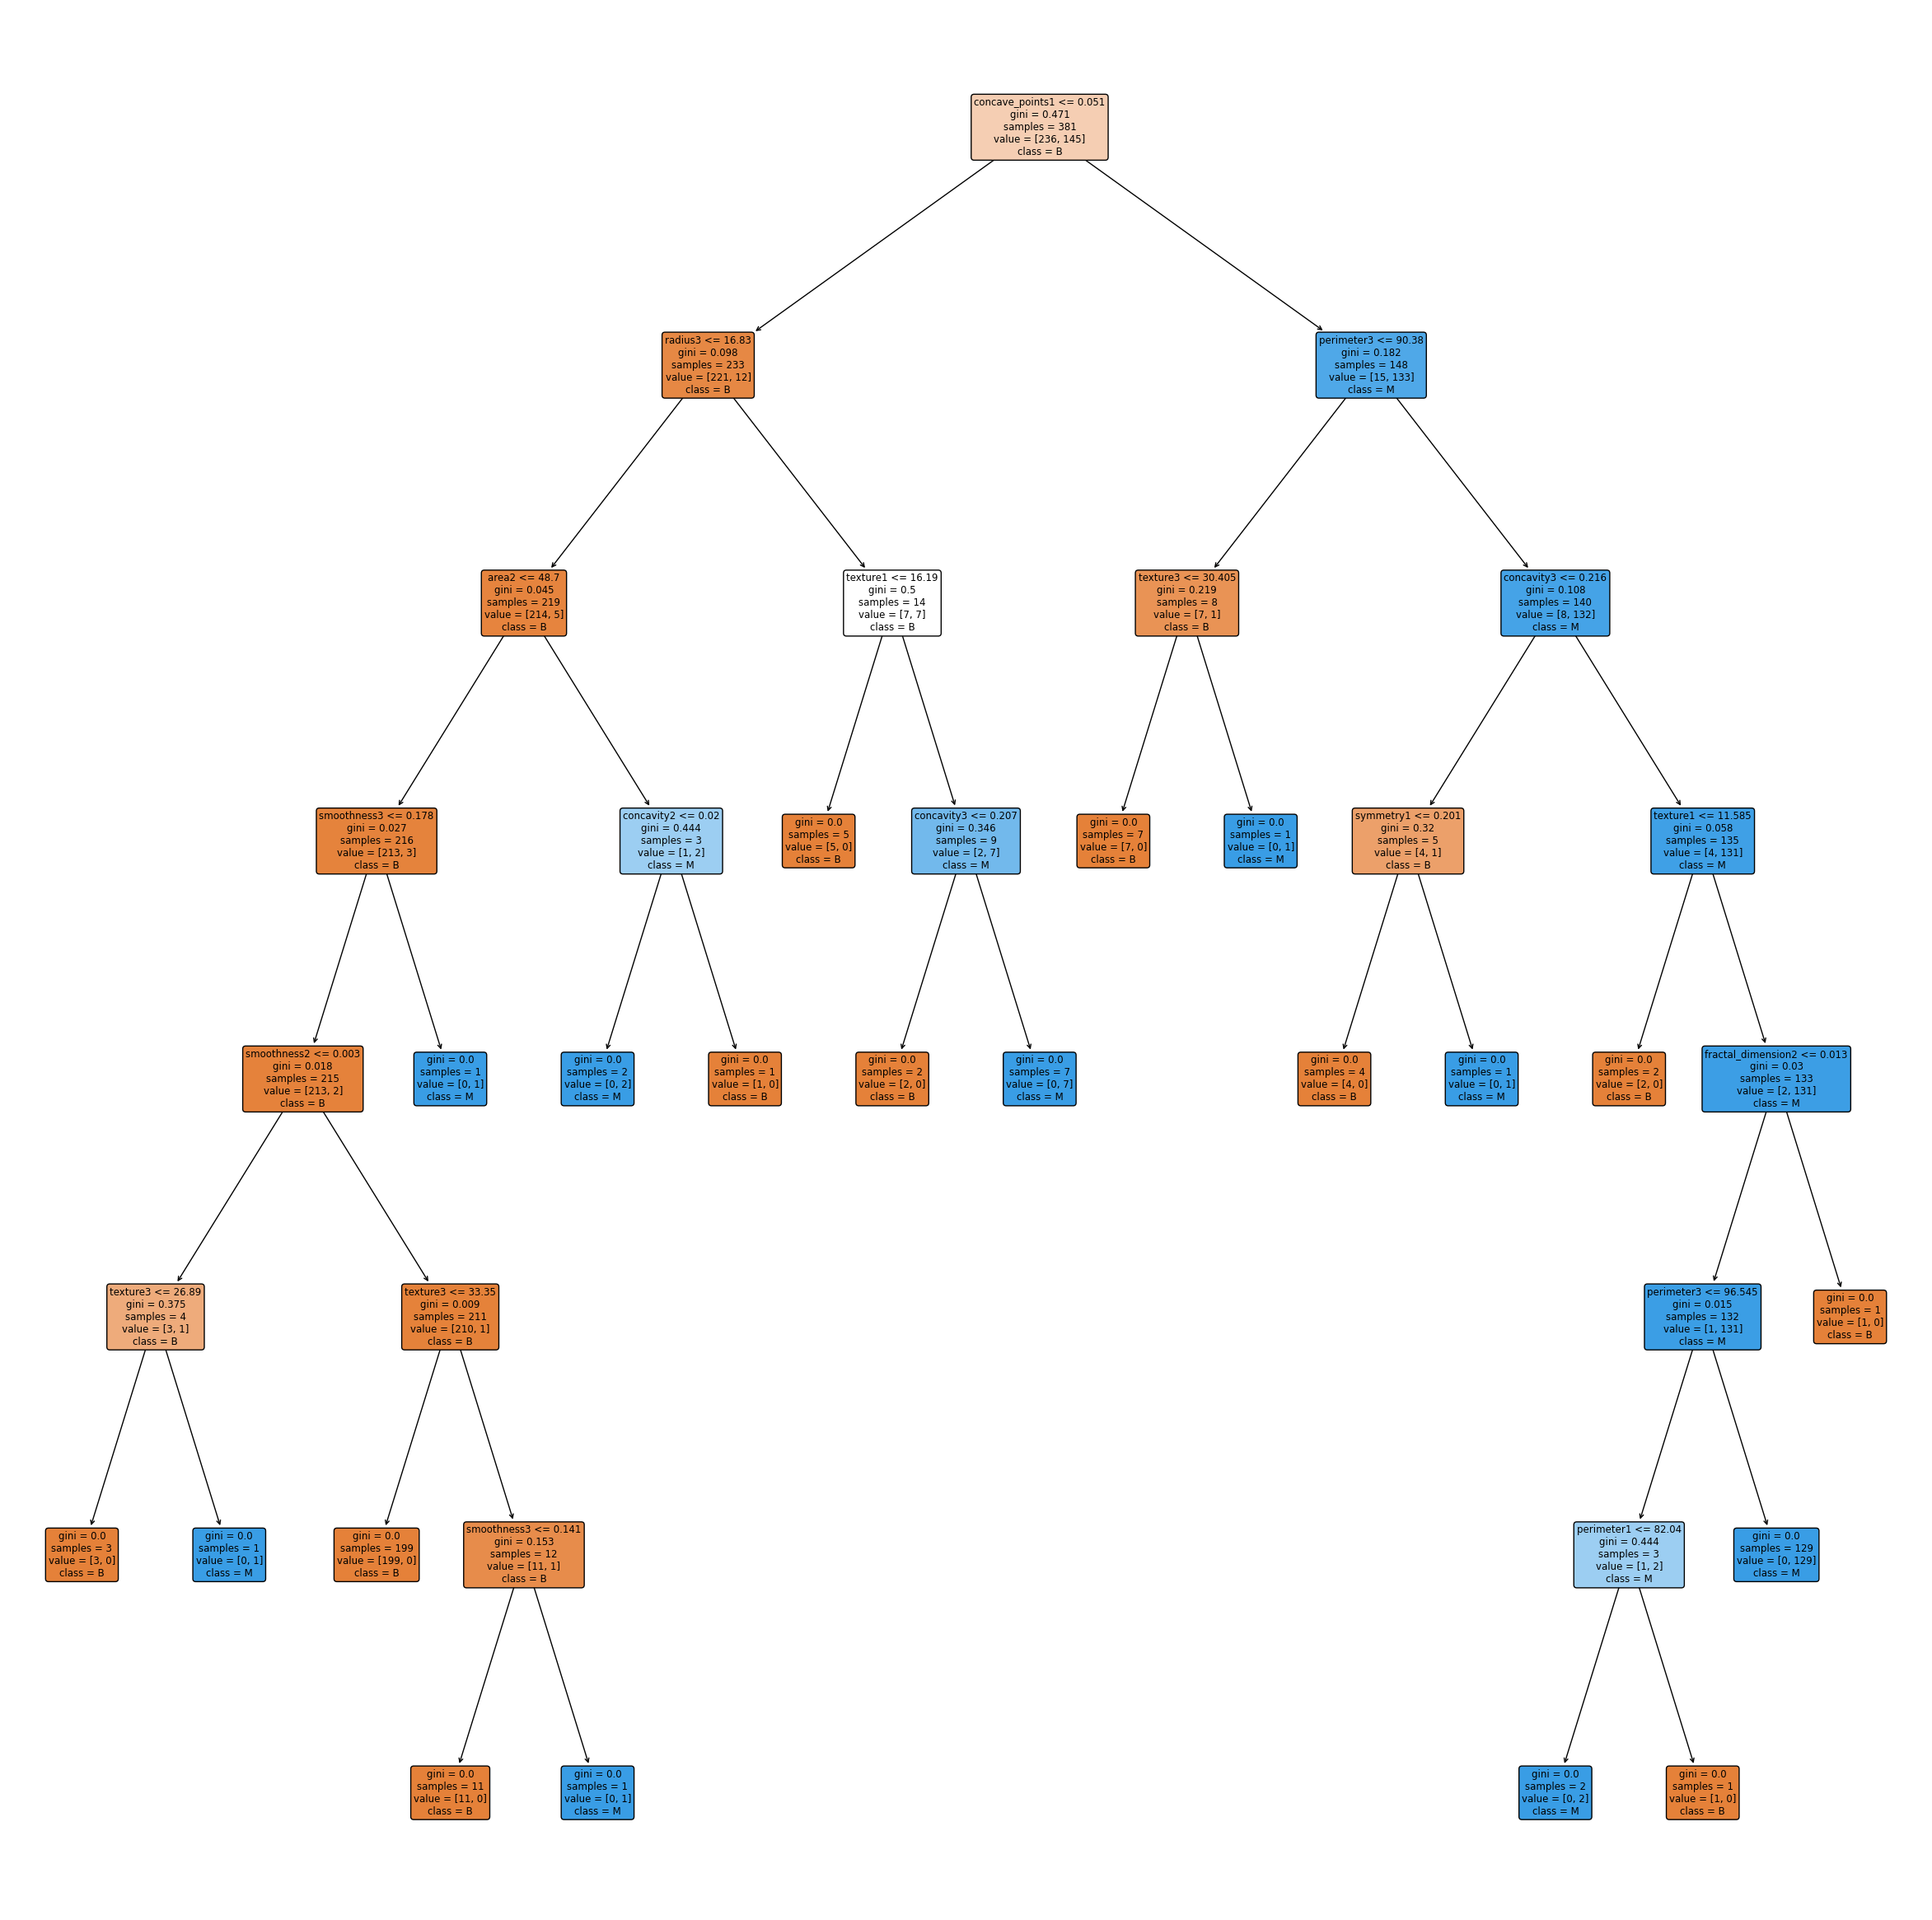

In [24]:
# Visualizando essa árvore
fig, ax = plt.subplots(figsize=(30,30))

tree.plot_tree(wdbc_clf,feature_names = names, class_names = wdbc_clf.classes_,filled=True,  rounded=True )

plt.show()

In [25]:
# Fazendo a previsão
y_pred2 = wdbc_clf.predict(X_test)

In [26]:
# Avaliando o modelo
# Fazendo a previsão e avaliando o erro
y_pred = wdbc_clf.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[112,   9],
       [  6,  61]])

In [27]:
# Criando o classificador e fazendo o fit
wdbc_clf = tree.DecisionTreeClassifier(random_state=42,criterion='entropy').fit(X_train,y_train)

In [28]:
importances = wdbc_clf.feature_importances_

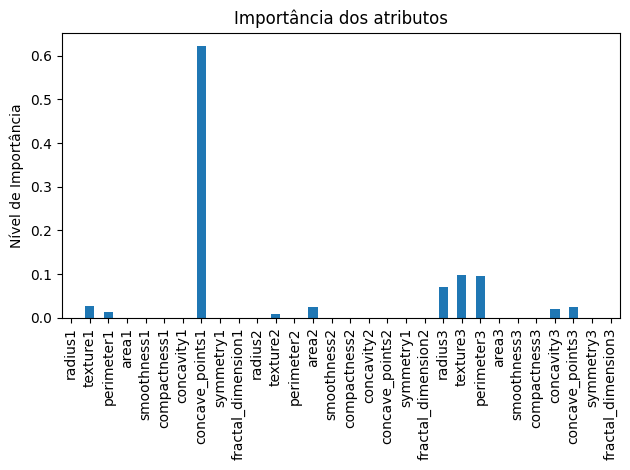

In [29]:
wdbc_clf_importances = pd.Series(importances, index=names)

fig, ax = plt.subplots()
wdbc_clf_importances.plot.bar(ax=ax)
ax.set_title("Importância dos atributos")
ax.set_ylabel("Nível de Importância")
fig.tight_layout()

In [30]:
# Verificando o score
wdbc_clf.score(X_train,y_train)

1.0

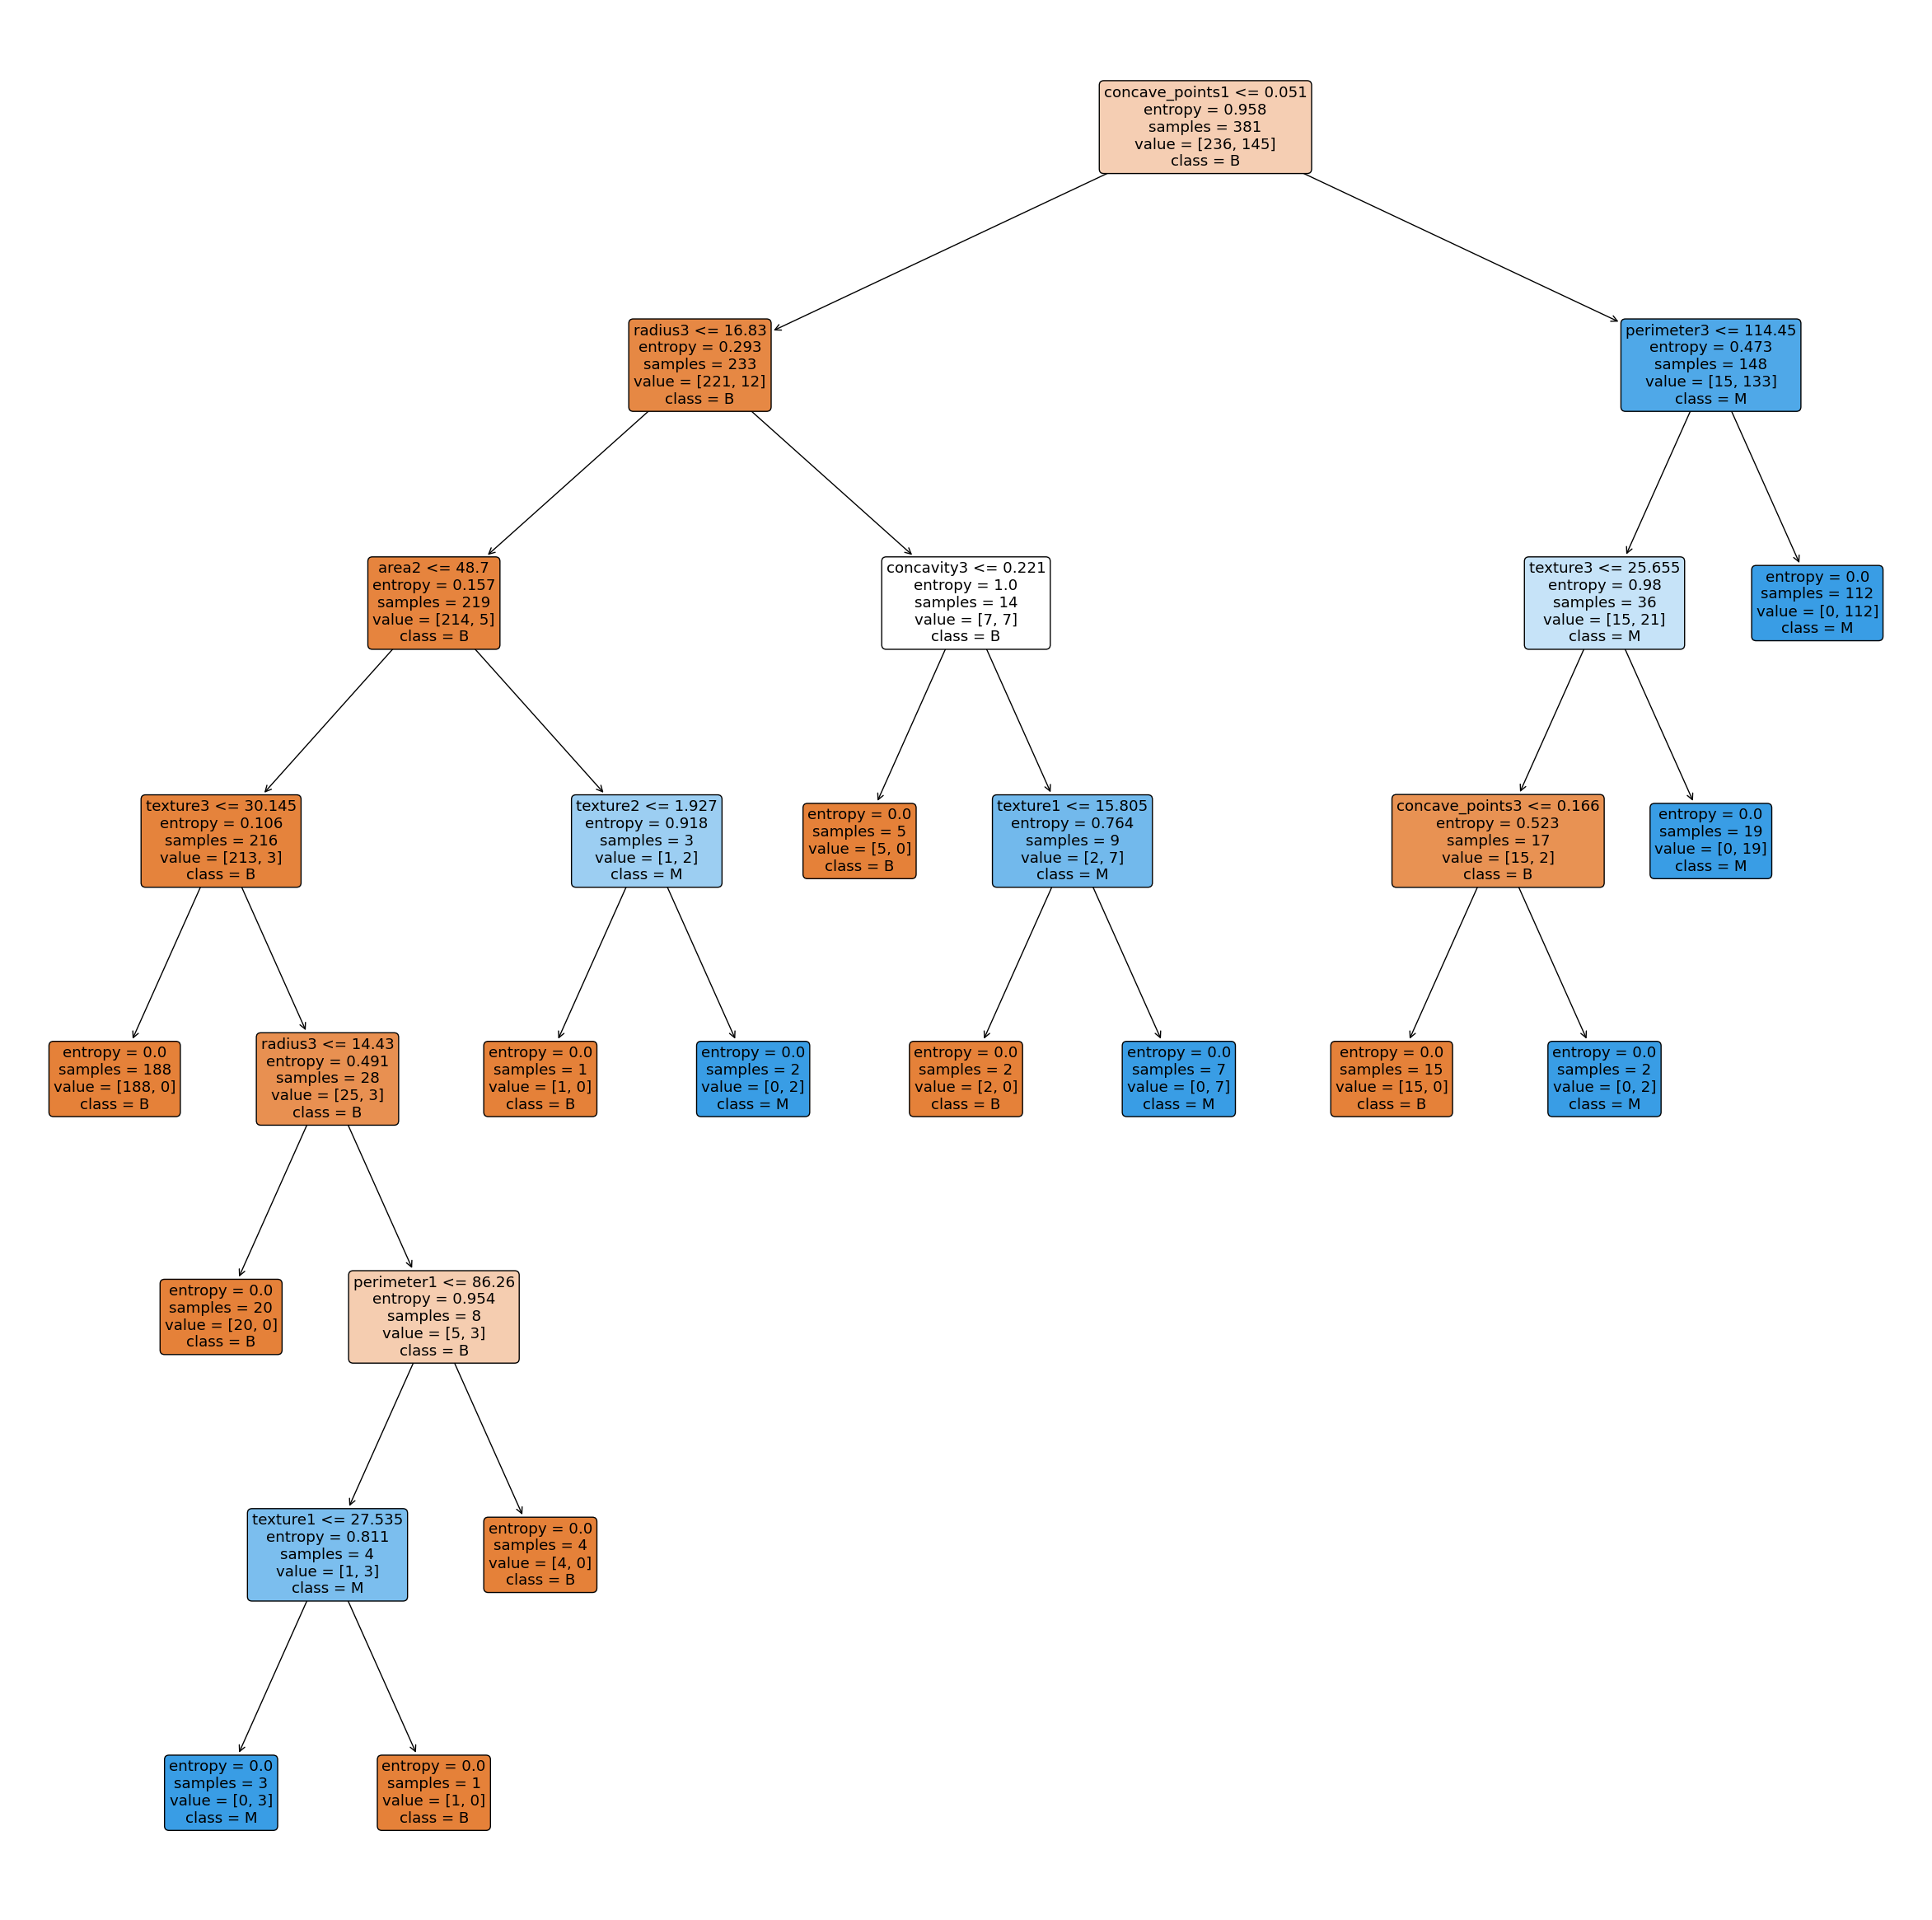

In [31]:
# Visualizando essa árvore
fig, ax = plt.subplots(figsize=(30,30))

tree.plot_tree(wdbc_clf,feature_names = names, class_names = wdbc_clf.classes_,filled=True,  rounded=True )

plt.show()

In [32]:
# Avaliando o modelo
# Fazendo a previsão e avaliando o erro
y_pred = wdbc_clf.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[119,   2],
       [  8,  59]])

# wdbcMean

In [41]:
# Separando X e y
X = wdbcMean.drop(['ID','Diagnosis'],axis=1)
Y = wdbcMean.Diagnosis
namesMean = ["radiusmean","texturemean","perimetermean","areamean","smoothnessmean","compactnessmean","concavitymean","concave_pointsmean","symmetrymean","fractal_dimensionmean"]

In [45]:
# Fazendo o train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [46]:
# Criando o classificador e fazendo o fit
wdbcMean_clf = tree.DecisionTreeClassifier(random_state=42,max_depth=10).fit(X_train,y_train)

In [47]:
wdbcMean_importances = wdbcMean_clf.feature_importances_

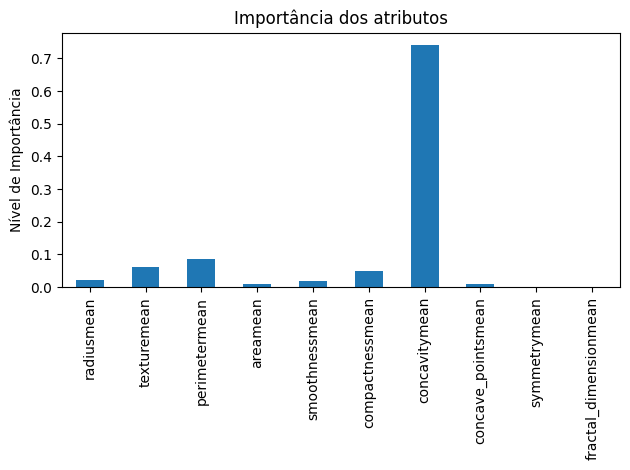

In [48]:
wdbcMean_clf_importances = pd.Series(wdbcMean_importances, index=namesMean)

fig, ax = plt.subplots()
wdbcMean_clf_importances.plot.bar(ax=ax)
ax.set_title("Importância dos atributos")
ax.set_ylabel("Nível de Importância")
fig.tight_layout()

In [49]:
# Verificando o score
wdbcMean_clf.score(X_train,y_train)

1.0

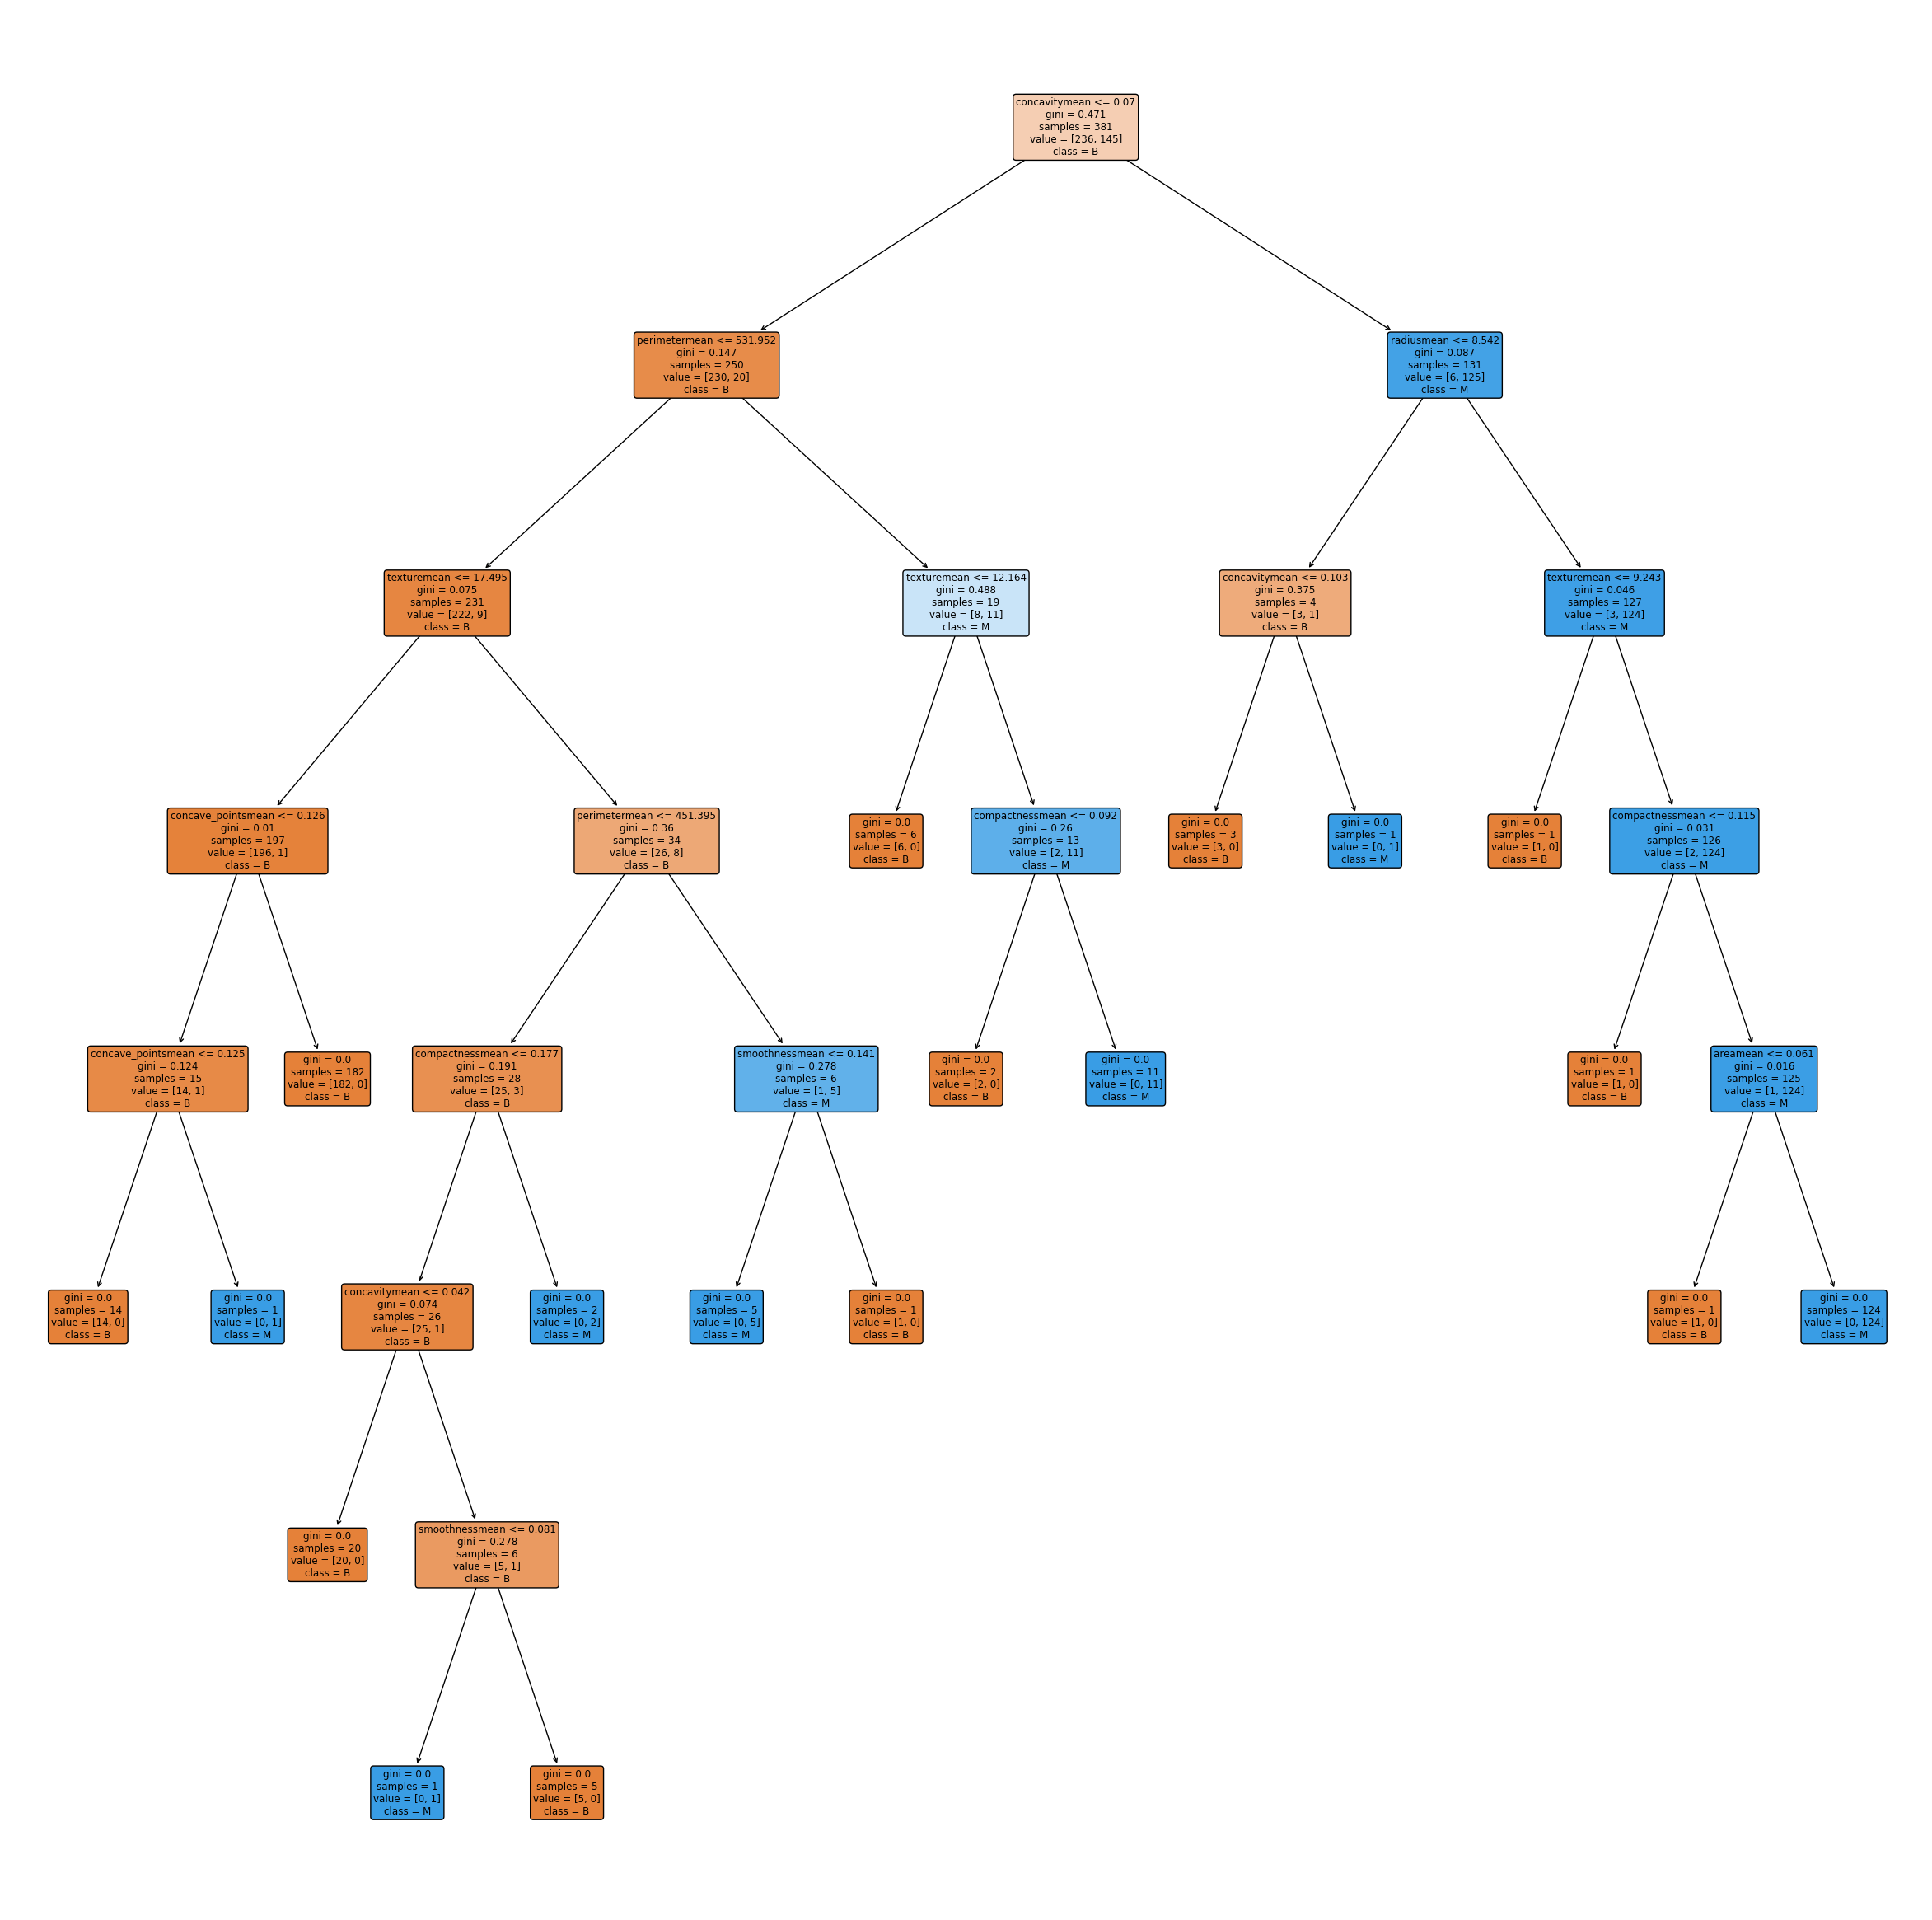

In [50]:
# Visualizando essa árvore
fig, ax = plt.subplots(figsize=(30,30))

tree.plot_tree(wdbcMean_clf,feature_names = namesMean, class_names = wdbcMean_clf.classes_,filled=True,  rounded=True )

plt.show()

In [51]:
# Avaliando o modelo
# Fazendo a previsão e avaliando o erro
y_pred = wdbcMean_clf.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[113,   8],
       [  6,  61]])

In [52]:
# Criando o classificador e fazendo o fit
wdbcMean_clf = tree.DecisionTreeClassifier(random_state=42,criterion='entropy').fit(X_train,y_train)

In [54]:
wdbcMean_importances = wdbcMean_clf.feature_importances_

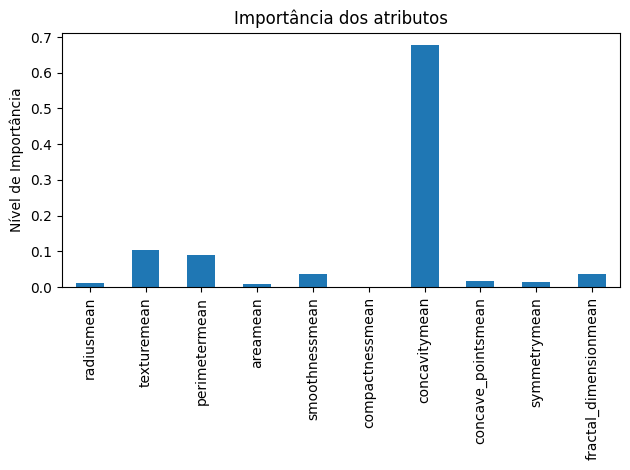

In [55]:
wdbc_clf_importances = pd.Series(importances, index=names)

fig, ax = plt.subplots()
wdbc_clf_importances.plot.bar(ax=ax)
ax.set_title("Importância dos atributos")
ax.set_ylabel("Nível de Importância")
fig.tight_layout()

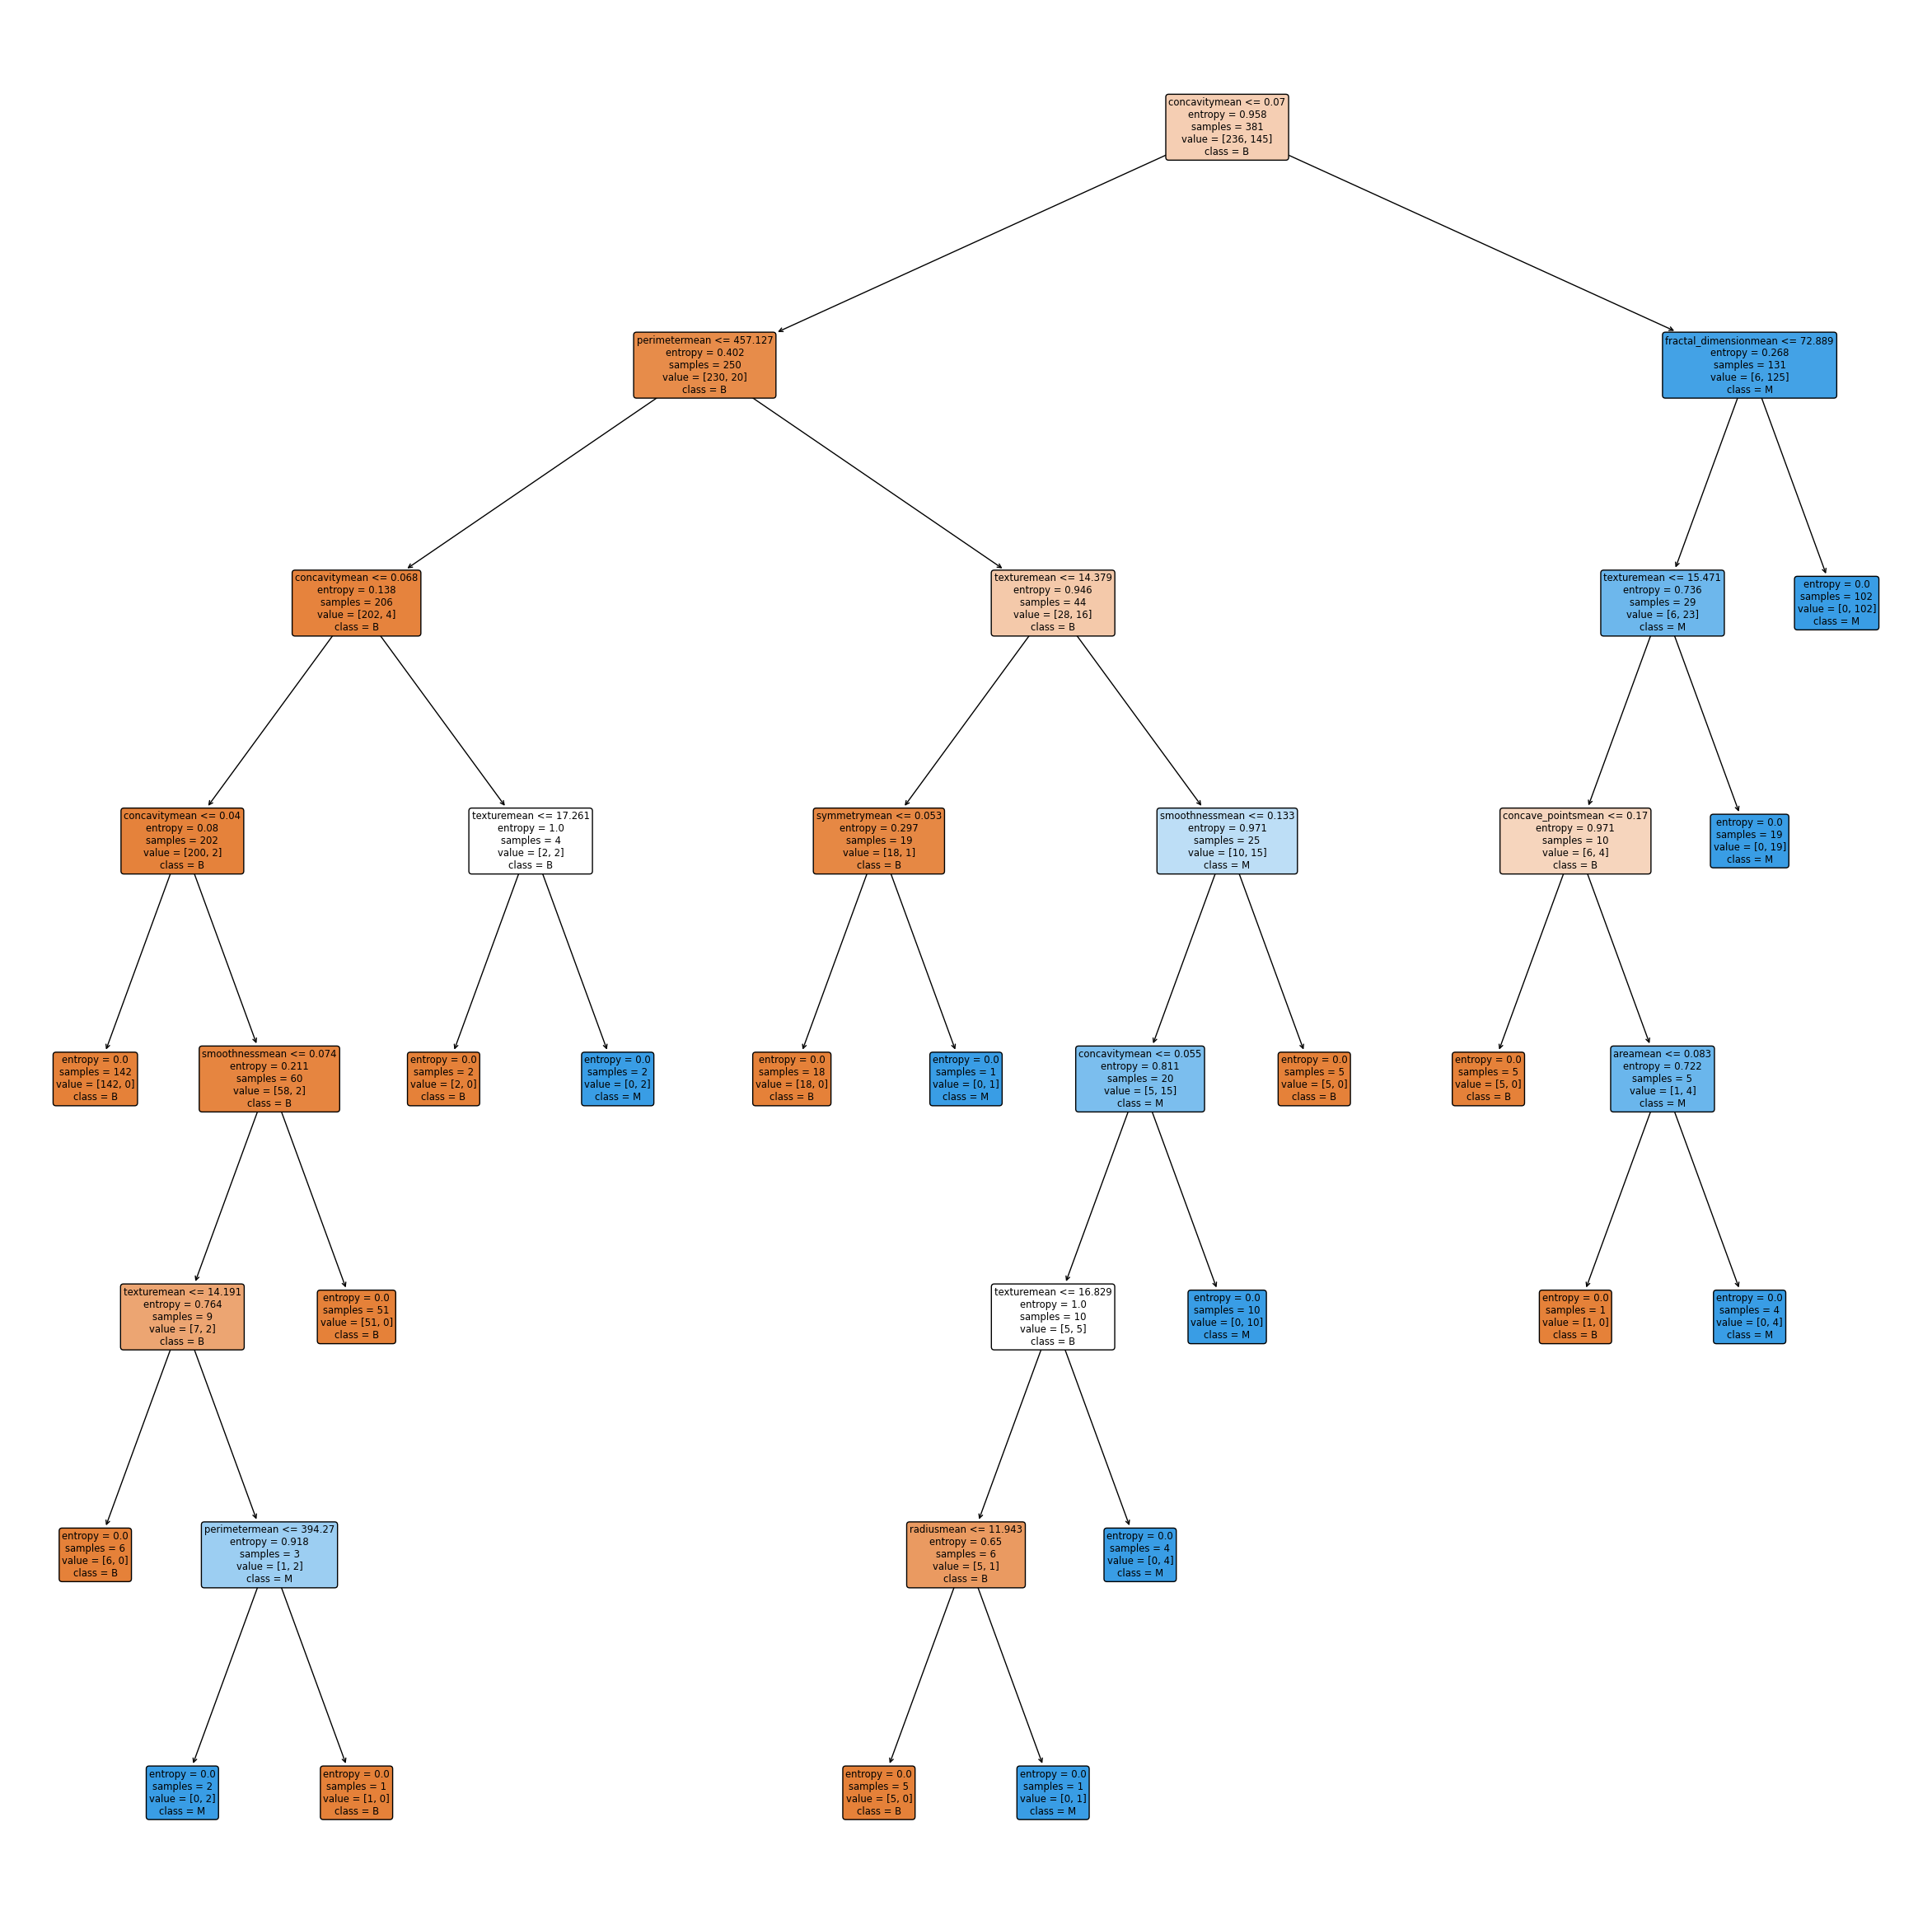

In [56]:
# Visualizando essa árvore
fig, ax = plt.subplots(figsize=(30,30))

tree.plot_tree(wdbcMean_clf,feature_names = namesMean, class_names = wdbcMean_clf.classes_,filled=True,  rounded=True )

plt.show()

In [57]:
# Avaliando o modelo
# Fazendo a previsão e avaliando o erro
y_pred = wdbcMean_clf.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[113,   8],
       [  3,  64]])

# wdbcSum

In [64]:
# Separando X e y
X = wdbcsum.drop(['ID','Diagnosis'],axis=1)
Y = wdbcsum.Diagnosis
namesum = ["radiussum","texturesum","perimetersum","areasum","smoothnesssum","compactnesssum","concavitysum","concave_pointssum","symmetrysum","fractal_dimensionsum"]

In [65]:
# Fazendo o train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [77]:
# Criando o classificador e fazendo o fit
wdbcSum_clf = tree.DecisionTreeClassifier(random_state=42,max_depth=10).fit(X_train,y_train)

In [78]:
wdbcsum_importances = wdbcSum_clf.feature_importances_

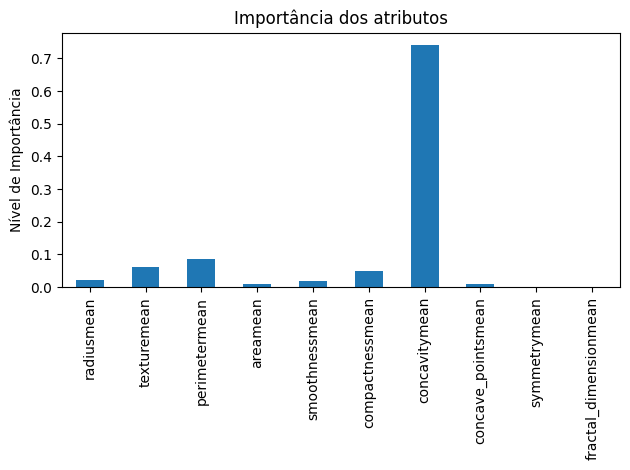

In [79]:
wdbcsum_clf_importances = pd.Series(wdbcsum_importances, index=namesum)

fig, ax = plt.subplots()
wdbcMean_clf_importances.plot.bar(ax=ax)
ax.set_title("Importância dos atributos")
ax.set_ylabel("Nível de Importância")
fig.tight_layout()

In [80]:
# Verificando o score
wdbcSum_clf.score(X_train,y_train)

1.0

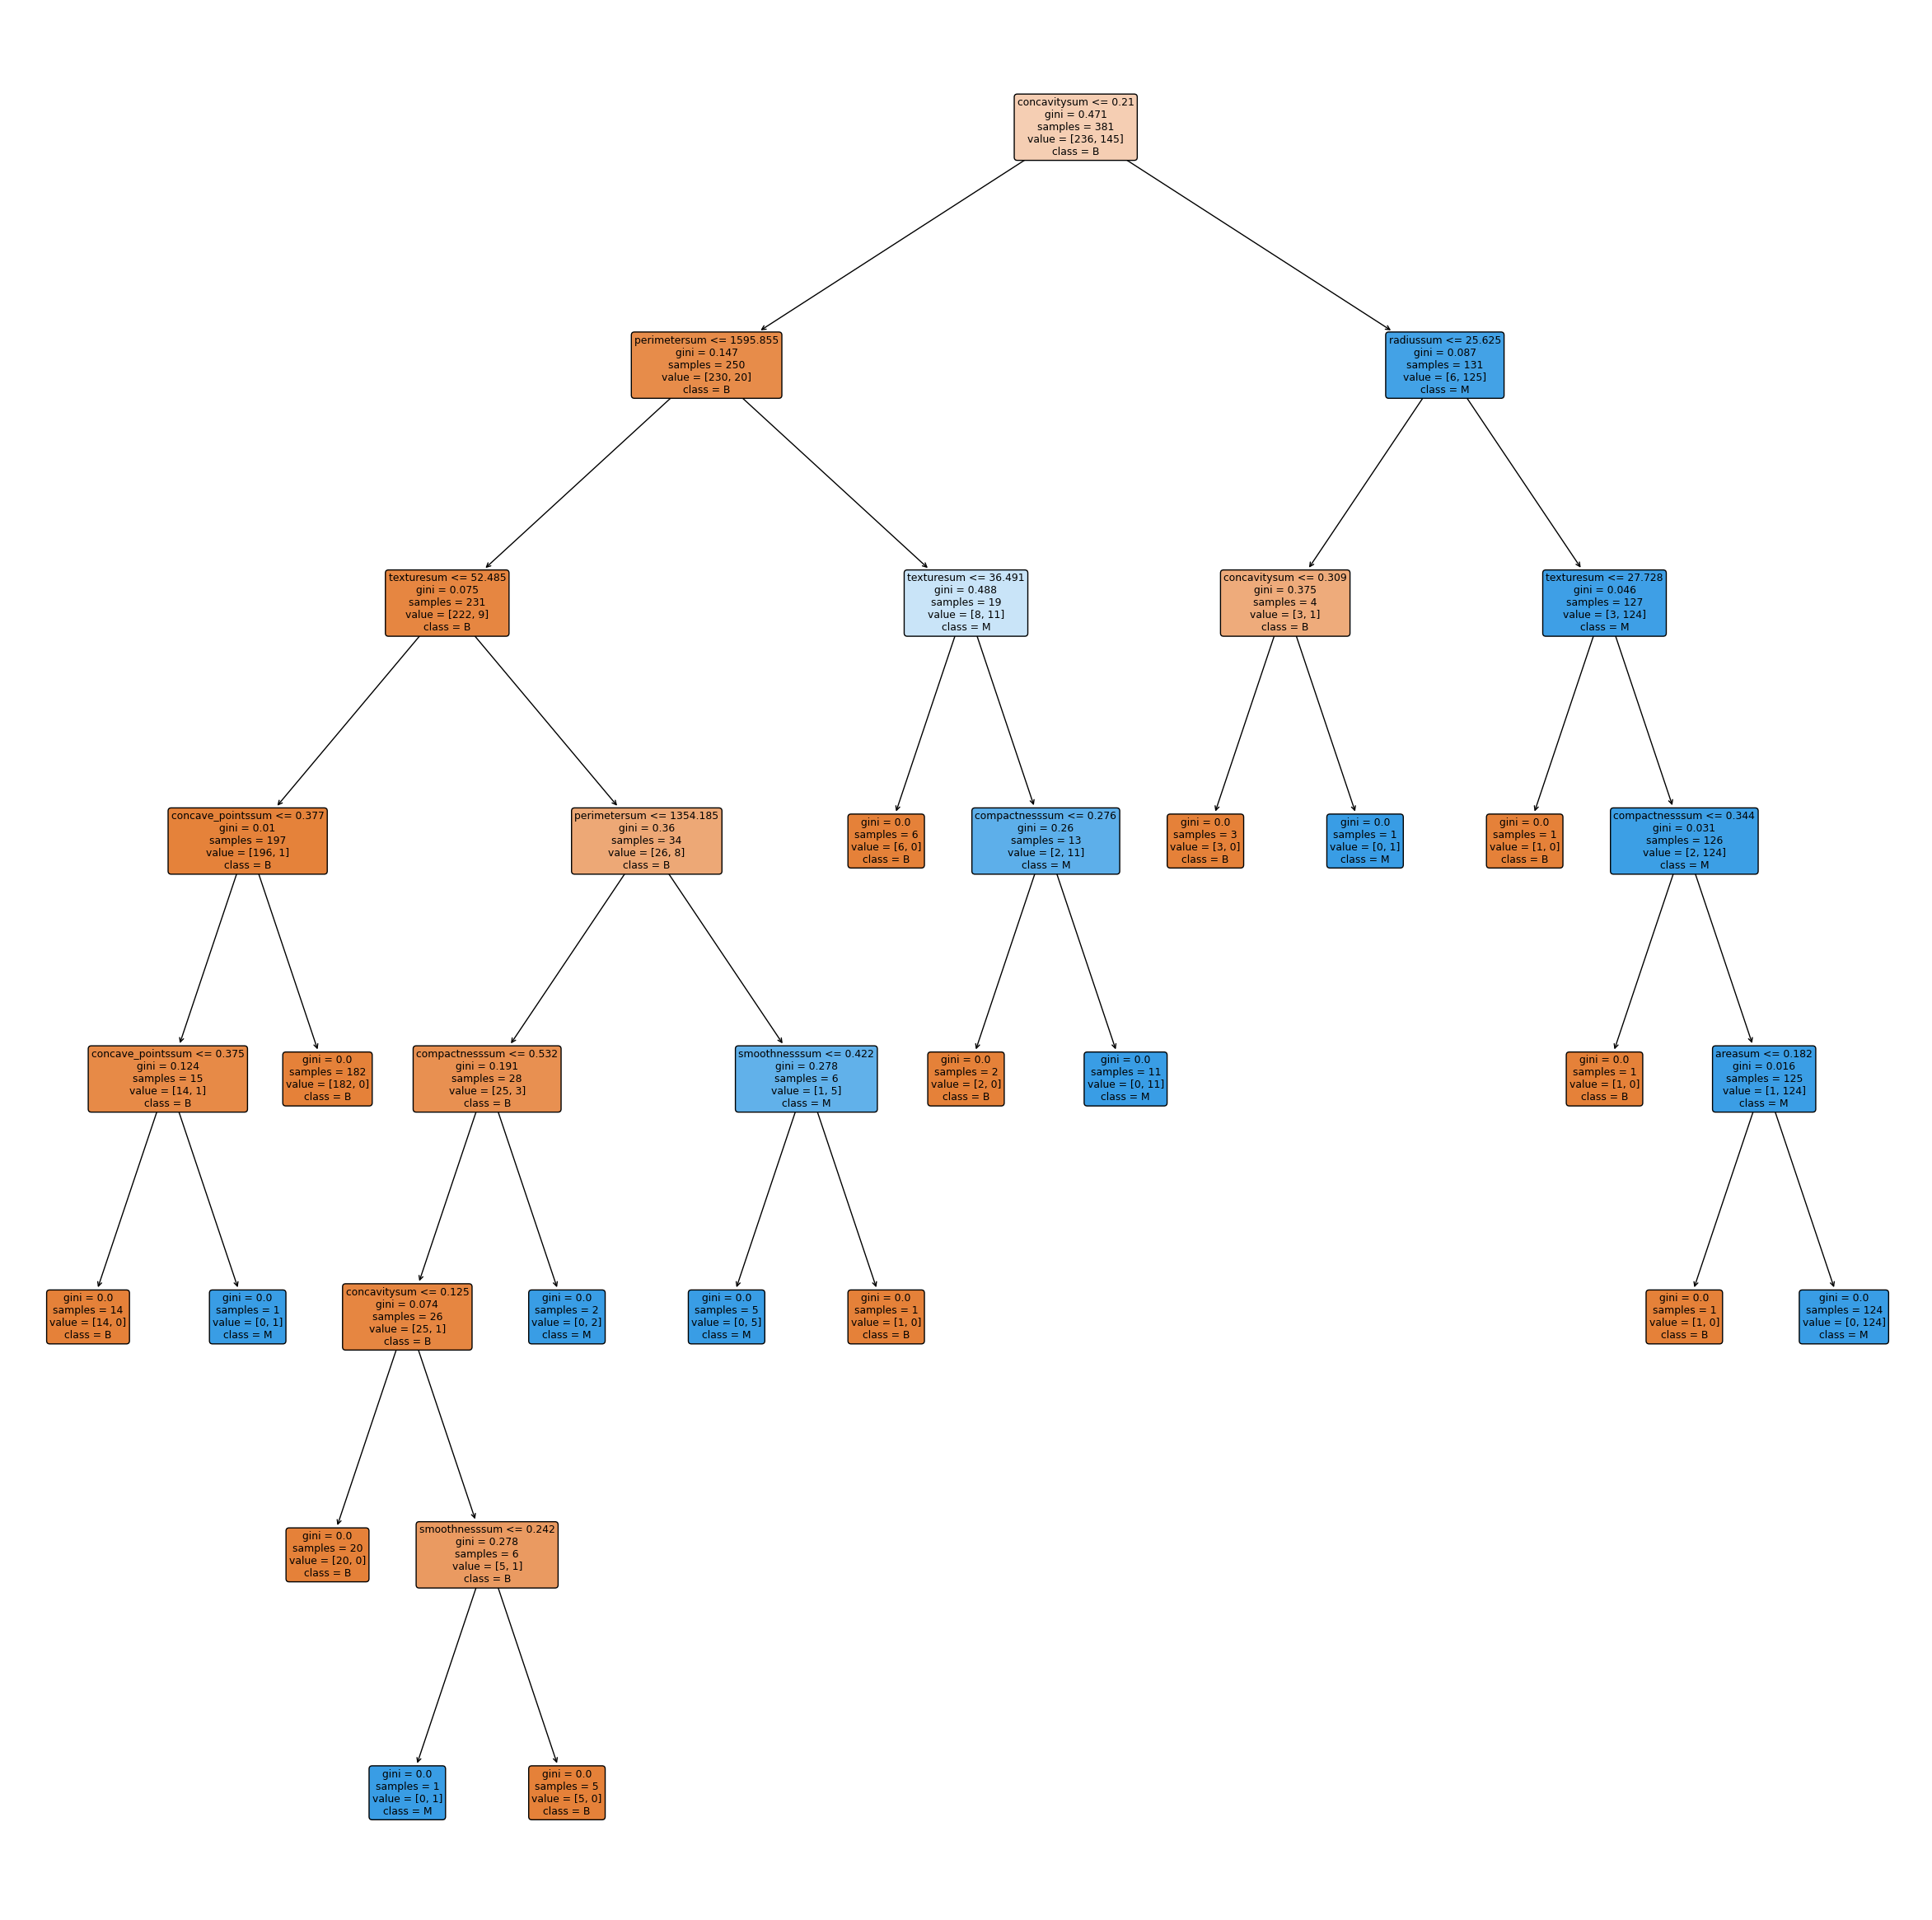

In [72]:
# Visualizando essa árvore
fig, ax = plt.subplots(figsize=(30,30))

tree.plot_tree(wdbcSum_clf,feature_names = namesum, class_names = wdbcMean_clf.classes_,filled=True,  rounded=True )

plt.show()

In [73]:
# Avaliando o modelo
# Fazendo a previsão e avaliando o erro
y_pred = wdbcSum_clf.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[113,   8],
       [  6,  61]])

In [81]:
# Criando o classificador e fazendo o fit
wdbcSum_clf = tree.DecisionTreeClassifier(random_state=42,criterion='entropy').fit(X_train,y_train)

In [82]:
wdbcsum_importances = wdbcSum_clf.feature_importances_

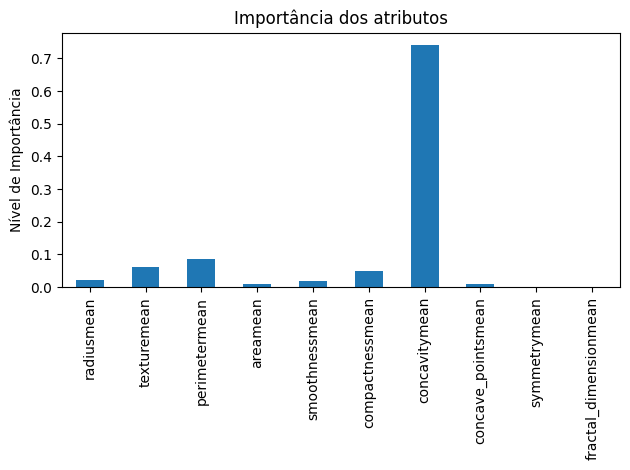

In [83]:
wdbcsum_clf_importances = pd.Series(wdbcsum_importances, index=namesum)

fig, ax = plt.subplots()
wdbcMean_clf_importances.plot.bar(ax=ax)
ax.set_title("Importância dos atributos")
ax.set_ylabel("Nível de Importância")
fig.tight_layout()

In [84]:
# Verificando o score
wdbcSum_clf.score(X_train,y_train)

1.0

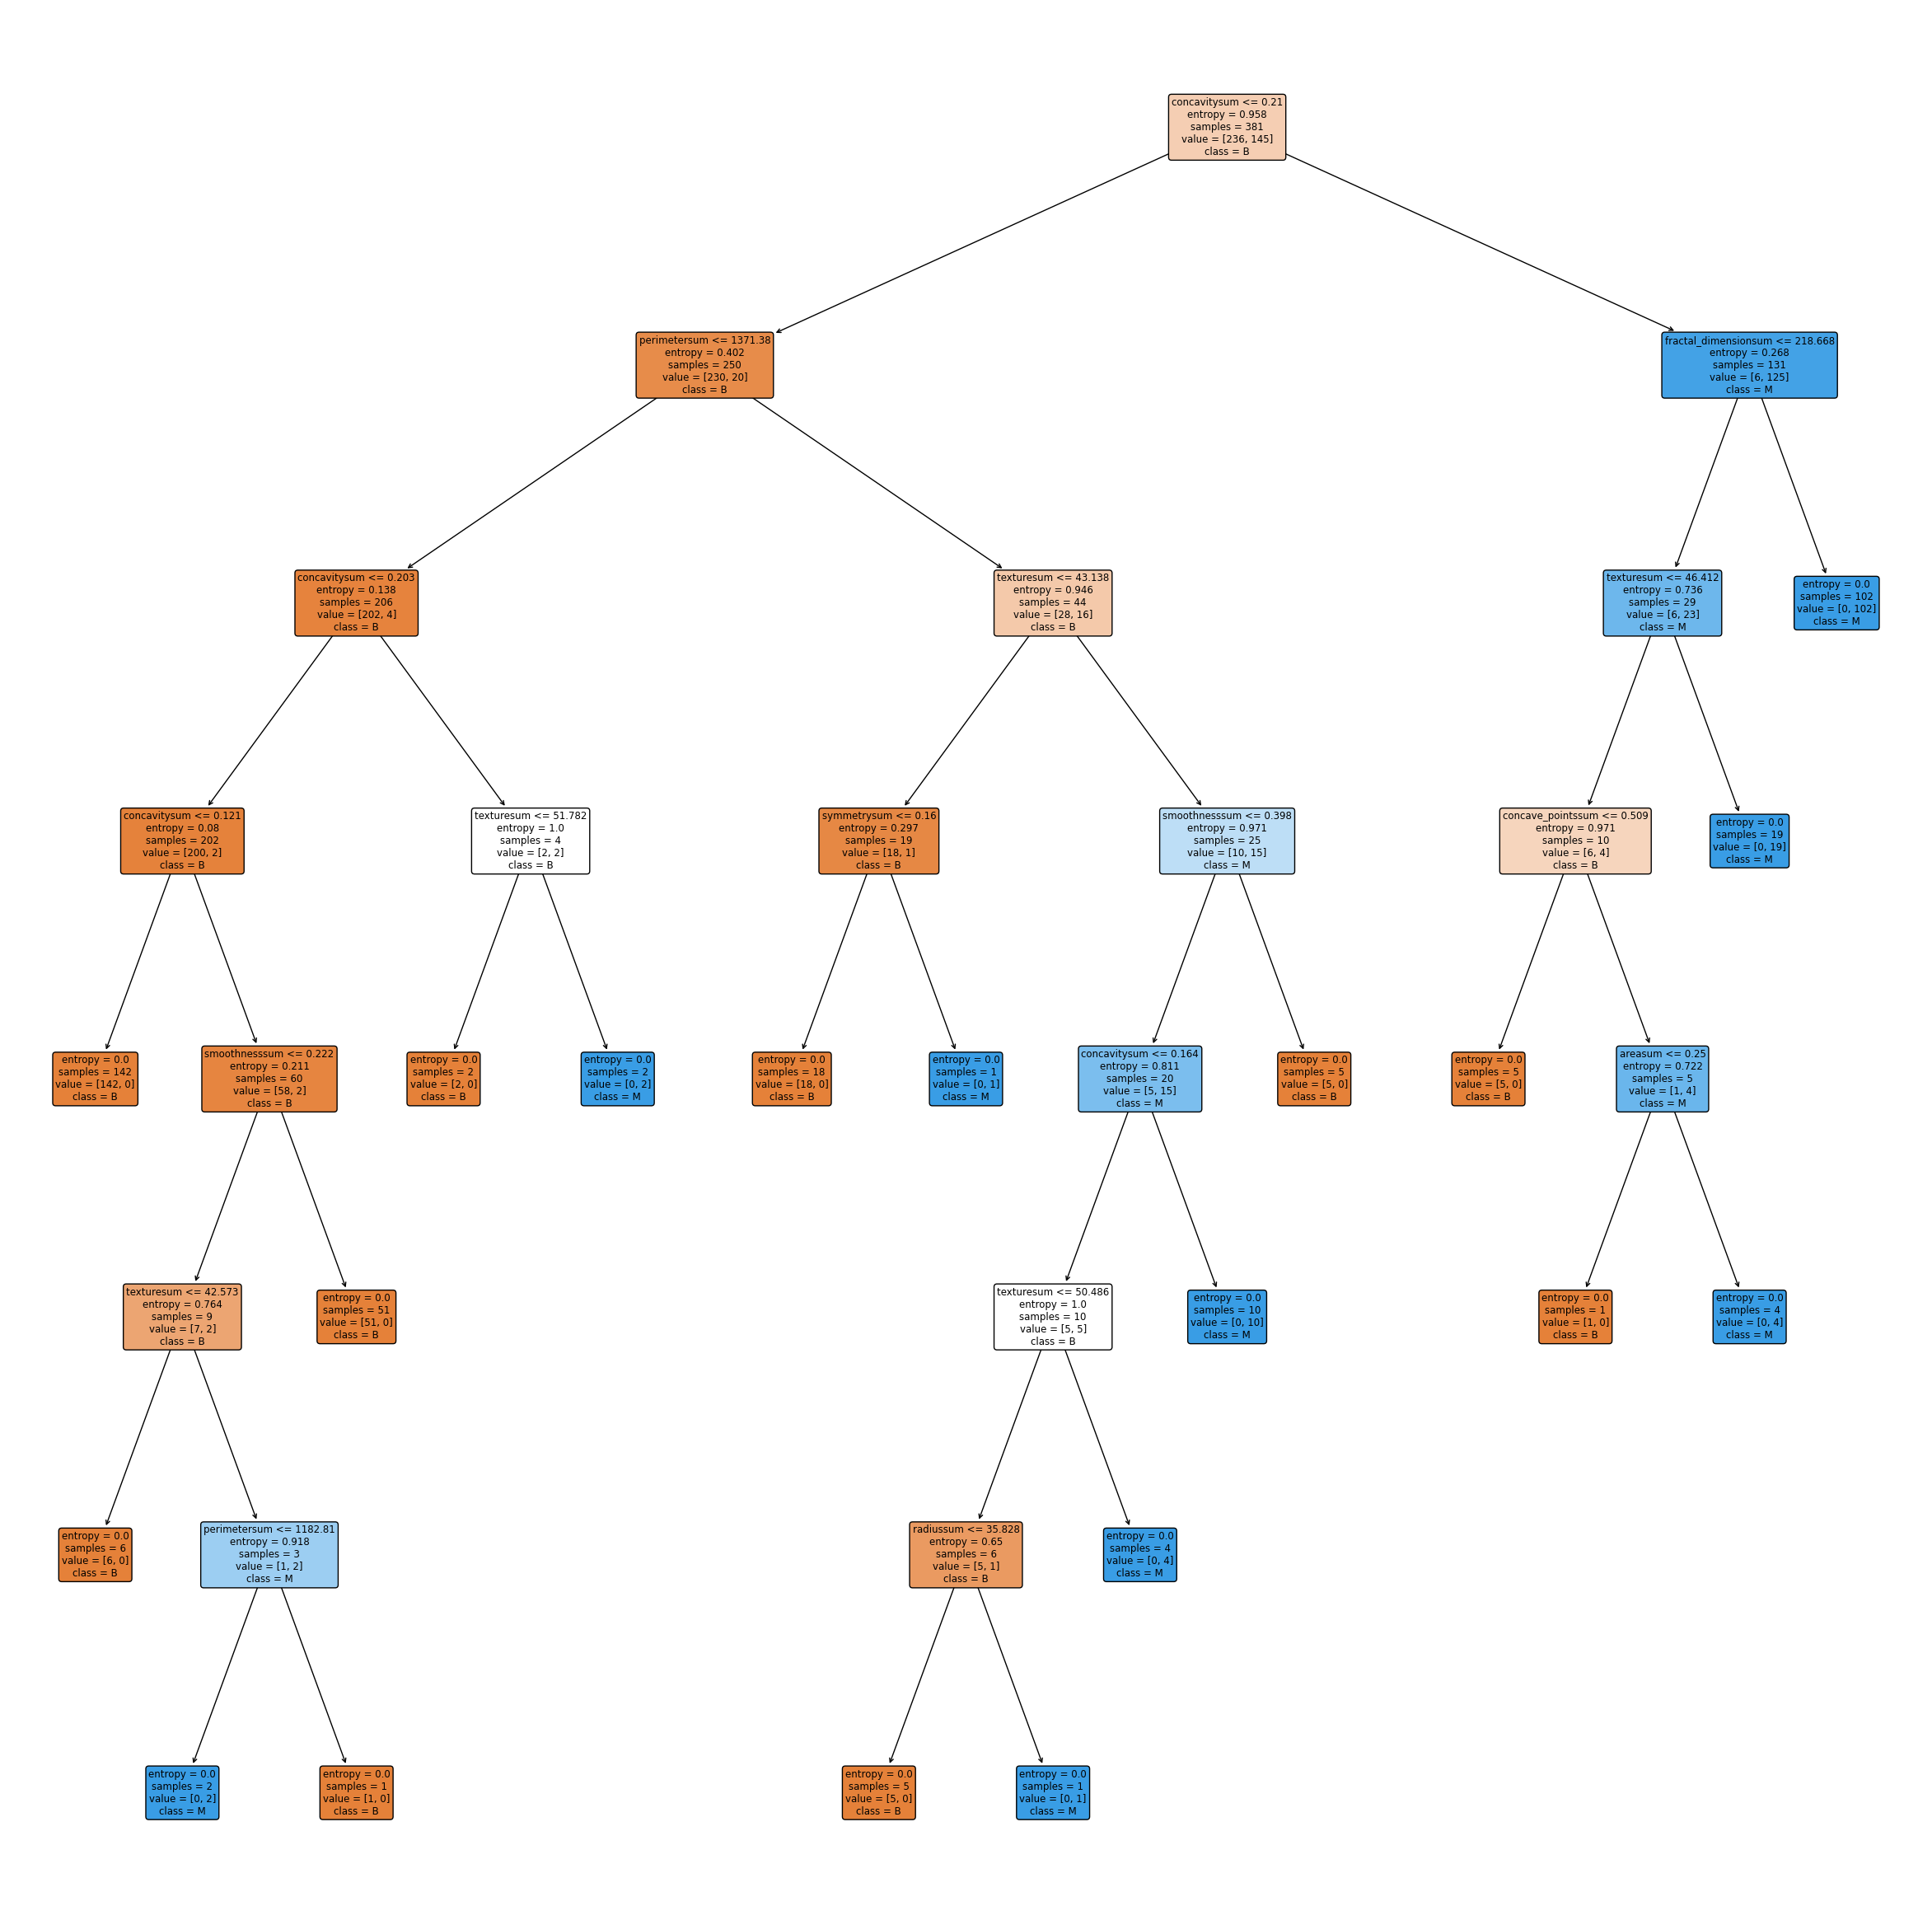

In [85]:
# Visualizando essa árvore
fig, ax = plt.subplots(figsize=(30,30))

tree.plot_tree(wdbcSum_clf,feature_names = namesum, class_names = wdbcMean_clf.classes_,filled=True,  rounded=True )

plt.show()

In [86]:
# Avaliando o modelo
# Fazendo a previsão e avaliando o erro
y_pred = wdbcSum_clf.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[113,   8],
       [  3,  64]])